# Overview 

This notebook contains all code and discussions for the __novice iteration__ of the research question involving __relationship between malignancy, age, and sex__. The specific question asked is: do malignant lesions occur more frequently based on sex and age?  At the novice level, this requires data acquisition and minimal pre-processing, coupled with exploratory charts.



# Table of Contents

1. [Setup](#another_cell) <br>
2. [Data Loading](#load_cell) <br>

3. [Data wrangling](#w_cell) <br>
    i. [Population](#populate) <br>
    ii. [Confusion Matrix](#conf_cell) <br>
    iii. [Violin Plot](#violin_cell)
4. [Visualization](#viz_cell)


<a id='another_cell'></a>
# Setup
Import packages

In [1]:
import PIL
import glob
import os
from os import listdir
from os.path import isfile, join
import json
import numpy as np
import seaborn as sns # pip install -U seaborn
from matplotlib import pyplot as plt
import pandas as pd
import warnings
import matplotlib
warnings.filterwarnings('ignore')

# Load data from directories <a id='load_cell'></a>
Create paths to image and description folders

In [2]:
img_filepaths = glob.glob('../../sample_imgs/*.jp*')
seg_filepaths = glob.glob('../../sample_segs/*.png')
des_paths = glob.glob('../../sample_dscs/*')

# Data wrangling <a id='w_cell'></a>

In [3]:
malignant = []
benign    = []
sex       = []
status    = []
age       = []

### Populate the above lists by reading in data from the JSON files <a id="populate"></a>

In [4]:
for i in range(len(des_paths)):
    im = des_paths[i]
    with open(im) as json_file:
        j = json.load(json_file)
        
        # To view json format uncomment the two lines below 
        #print(json.dumps(j, indent=4))
        #break
        try: 
            if j["meta"]["clinical"]["benign_malignant"] == "malignant":

                # Add a person's age and sex to the malignant list
                malignant.append(j["meta"]["clinical"]["age_approx"])
                malignant.append(j["meta"]["clinical"]["sex"])

                # Add their age and sex to their appropriate lists
                sex.append(j["meta"]["clinical"]["sex"])
                age.append(j["meta"]["clinical"]["age_approx"])

                # Add their status to the status list (Malignant or Benign)
                status.append('Malignant')

            elif j["meta"]["clinical"]["benign_malignant"] == "benign":

                # Add their age and sex to the benign list
                benign.append(j["meta"]["clinical"]["age_approx"])
                benign.append(j["meta"]["clinical"]["sex"])

                # Add their age and sex to their appropriate lists
                sex.append(j["meta"]["clinical"]["sex"])
                age.append(j["meta"]["clinical"]["age_approx"])

                # Add their status to the status list (Malignant or Benign)
                status.append('Benign')
        except KeyError:
            continue #print("No malignancy data for: ", j['_id'])
lesion_data = pd.DataFrame({'Sex': sex, 'Status': status, 'Age': age})

### Confsuion Matrix <a id='conf_cell'></a>
Assign each variable the number of people that belong to that group

In [5]:
benign_females = benign.count('female')
benign_males   = benign.count('male')

malignant_females = malignant.count('female')
malignant_males   = malignant.count('male')


### Create a 2x2 confusion matrix with the appropriate labels

In [6]:
conf_mat = np.array([[benign_females, benign_males], 
                     [malignant_females, malignant_males]])

### Get the labels for the confusion matrix (count, percentage, and names)

In [7]:
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in conf_mat.flatten()/np.sum(conf_mat)]

group_names = ['Benign (F)','Benign (M)','Malig. (F)','Malig. (M)']

labels = [f"\n{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

Sexes = ['Female','Male']
malignancy = ["Benign", "Malignant"]

### Violin plot <a id='violin_cell'></a>
Create lists that contain all the benign and malignant ages 

In [8]:
benign_ages    = [x for x in benign if isinstance(x, int)]
malignant_ages = [x for x in malignant if isinstance(x, int)]

diagnosis_age = benign_ages + malignant_ages
flags = ['benign'] * len(benign_ages) + ['malignant'] * len(malignant_ages)

# Visualization <a id='viz_cell'></a>

Add subplot parameters: <br>
Parameter 1: The number of rows <br> 
Parameter 2: The number of columns <br>
Parameter 3: The graph position <br>

Put four graphs on a 2x2 plot <br>

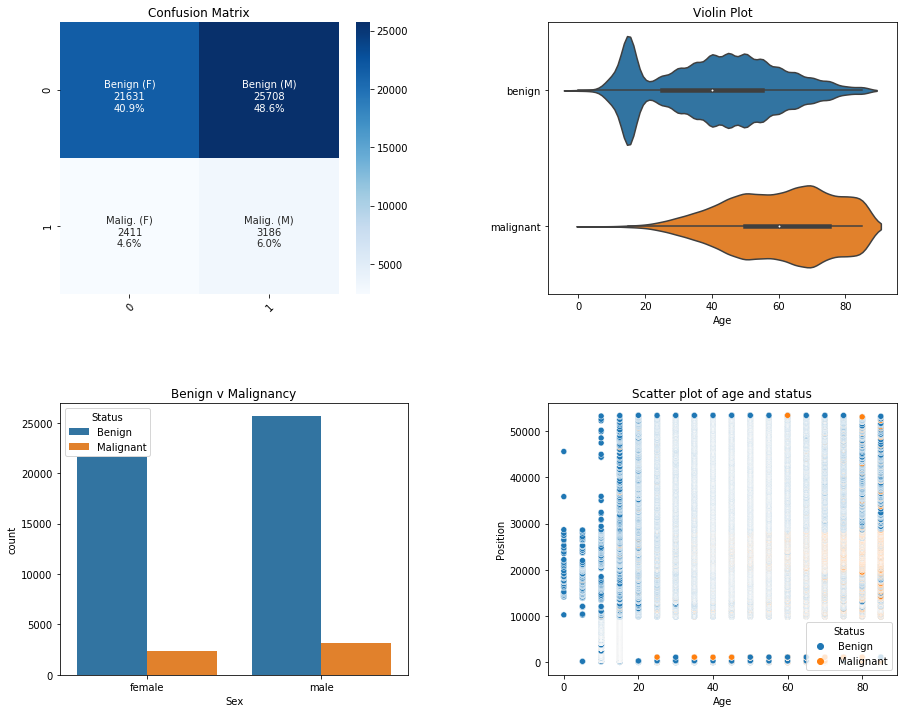

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(15,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Confusion Matrix')

ax2 = fig.add_subplot(2, 2, 2)
ax2.set(xlabel='Age')
ax2.set_title('Violin Plot')

ax3 = fig.add_subplot(2, 2, 3)
ax3.set(xlabel='Sex', ylabel='Count')
ax3.set_title('Benign v Malignancy')

ax4 = fig.add_subplot(2, 2, 4)
ax4.set(ylabel='Position')
ax4.set_title('Scatter plot of age and status')

# We want to show all ticks...
ax1.set_xticks(np.arange(len(Sexes)))
ax1.set_yticks(np.arange(len(malignancy)))

# ... and label them with the respective list entries
ax1.set_xticklabels(Sexes)
ax1.set_yticklabels(malignancy)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Use confusion matrix and labels
sns.heatmap(conf_mat, annot=labels, fmt="", cmap='Blues', ax=ax1)

# Use lists from violin plot
sns.violinplot(benign_ages  + malignant_ages, flags, ax=ax2)

# We use the lesion data to fill the remaining plots
sns.countplot(x="Sex", hue="Status", data=lesion_data, ax=ax3)

sns.scatterplot(x='Age', y=[i for i in range(len(lesion_data))], hue="Status", data = lesion_data, ax=ax4)

plt.savefig("../novice_Q2.png")
plt.show()

# What did you find out about malignant lesions? 
